# kNN na dobry początek!

Na początku pobierzmy wymagane zbiory

In [1]:
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [2]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

Przeprowadźmy klasyfikację win metodą kNN

Funckje do wyświetlania miar jakości modelu:

Funckja do testowania typów odległości:

ZADANIE DOMOWE: Przetestuj wpływ różnych rodzajów odległości i ilości sąsiadów na zbiorze glass.

# SVM

Przetestujmy SVM na zbiorze wine

In [3]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)

y = wine.pop('class')
X = wine

['one' 'two' 'three']


In [51]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 30)

In [8]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C= 0.1)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_pred_train), '\n')
print(confusion_matrix(y_test, y_pred))

[[45  0  2]
 [ 0 37  1]
 [ 0  1 56]] 

[[12  0  0]
 [ 0 10  0]
 [ 0  1 13]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(target, prediction, average = 'weighted'):
    accuracy = round(accuracy_score(target, prediction),4)
    precision = round(precision_score(target, prediction, average = average),4)
    recall = round(recall_score(target, prediction, average = average),4)
    f_score = round(f1_score(target, prediction, average = average),4)
    
    mislabeled = (target != prediction).sum()
    total = len(target)
    
    return accuracy, precision, recall, f_score, mislabeled, total

def print_result(metrics, calssifier_id = 'classifier'):
    print(f'Result for {calssifier_id}')
    print(f'----')
    print(f'Accuracy: {metrics[0]}')
    print(f'Precision: {metrics[1]}')
    print(f'Recall: {metrics[2]}')
    print(f'F1_score: {metrics[3]}')
    print(f'Mislabeled: {metrics[4]} out of {metrics[5]}')
    print(f'\n')

In [18]:
calculate_metrics(y_test, y_pred, average='weighted')

(0.9722, 0.9747, 0.9722, 0.9724, 1, 36)

In [19]:
print_result(calculate_metrics(y_test, y_pred, average='weighted'), 'SVM Classifier')

Result for SVM Classifier
----
Accuracy: 0.9722
Precision: 0.9747
Recall: 0.9722
F1_score: 0.9724
Mislabeled: 1 out of 36




I dobierzmy grid searchem optymalną wartość współczynnika regularyzacji

In [48]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
svm.fit(X_train,y_train)

parameters = [{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]},
              {'kernel': ['poly', 'rbf'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'], 'degree' : [0, 1, 2, 3, 4]}]

searcher = GridSearchCV(svm, parameters, cv = 3, scoring = 'f1_weighted')
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV scores", searcher.best_score_)

Best CV params {'C': 0.0001, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Best CV scores 0.943494667014556


In [50]:
for i in range(len(searcher.cv_results_['params'])):    
    print(f"Parametry: {searcher.cv_results_['params'][i]}")

    for key in searcher.cv_results_.keys():
        if key != 'params':
            print(f"{key}: {searcher.cv_results_[key][i]}")
            
    print("\n---\n")

Parametry: {'C': 0.01, 'kernel': 'linear'}
mean_fit_time: 0.010280211766560873
std_fit_time: 0.0034464202958356584
mean_score_time: 0.003642002741495768
std_score_time: 0.000984573019649556
param_C: 0.01
param_kernel: linear
param_degree: --
param_gamma: --
split0_test_score: 0.8947174358289365
split1_test_score: 0.9154625099556263
split2_test_score: 0.8710789672861828
mean_test_score: 0.893752971023582
std_test_score: 0.018132335007625695
rank_test_score: 24

---

Parametry: {'C': 0.1, 'kernel': 'linear'}
mean_fit_time: 0.03394873936971029
std_fit_time: 0.010839093791399867
mean_score_time: 0.002894163131713867
std_score_time: 0.00023635696114910064
param_C: 0.1
param_kernel: linear
param_degree: --
param_gamma: --
split0_test_score: 0.958622311827957
split1_test_score: 0.9574468085106383
split2_test_score: 0.8919591047250622
mean_test_score: 0.9360094083545526
std_test_score: 0.03115196504663305
rank_test_score: 13

---

Parametry: {'C': 1, 'kernel': 'linear'}
mean_fit_time: 0.044137

In [52]:
model = searcher.best_estimator_

In [53]:
model

SVC(C=0.0001, gamma='auto', kernel='poly')

In [55]:
y_pred = model.predict(X_test)

y_pred

array([0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0], dtype=int8)

In [58]:
print_result(calculate_metrics(y_test, y_pred, average='weighted'), 'Best SVM')

Result for Best SVM
----
Accuracy: 0.9722
Precision: 0.9741
Recall: 0.9722
F1_score: 0.972
Mislabeled: 1 out of 36




In [60]:
final_model = SVC(C=0.0001, gamma='auto', kernel='poly')
model.fit(X,y)

SVC(C=0.0001, gamma='auto', kernel='poly')

No dobrze, ale co w przypadku, gdy nasze dane nie są liniowo separowalne? Trzeba dokonać transofmracji. Do tego służy nam Kernel SVM

In [68]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise = 0.4, random_state=30)

C:\Users\Kacper\AppData\Local\Temp\ipykernel_16844\529107767.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g^" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X[:,0][y==0],X[:,1][y==0], 'g^', color = 'blue')


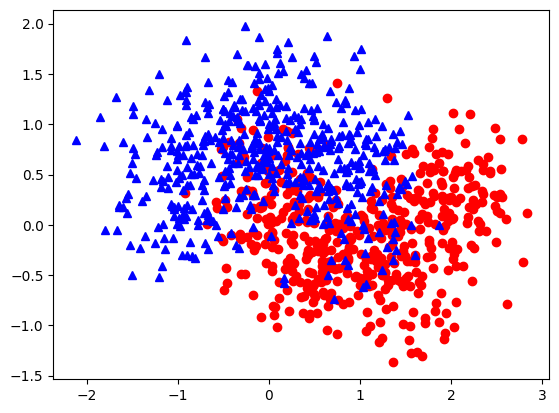

In [72]:
plt.plot(X[:,0][y==1],X[:,1][y==1], 'o', color = 'red')
plt.plot(X[:,0][y==0],X[:,1][y==0], 'g^', color = 'blue')

Porównajmy sobie różne wartości regularyzacji i przekształceń gamma

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 30)

In [76]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
svm.fit(X_train,y_train)

parameters = [{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]},
              {'kernel': ['poly', 'rbf'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20], 'gamma': ['scale', 'auto'], 'degree' : [0, 1, 2, 3, 4, 5]}]

searcher = GridSearchCV(svm, parameters, cv = 3, scoring = 'f1_weighted')
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV scores", searcher.best_score_)

Best CV params {'C': 10, 'degree': 0, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV scores 0.8562241041952724


In [77]:
for i in range(len(searcher.cv_results_['params'])):    
    print(f"Parametry: {searcher.cv_results_['params'][i]}")

    for key in searcher.cv_results_.keys():
        if key != 'params':
            print(f"{key}: {searcher.cv_results_[key][i]}")
            
    print("\n---\n")


Parametry: {'C': 0.01, 'kernel': 'linear'}
mean_fit_time: 0.0053416093190511065
std_fit_time: 0.0009509340561041419
mean_score_time: 0.004154284795125325
std_score_time: 0.0004525889838709019
param_C: 0.01
param_kernel: linear
param_degree: --
param_gamma: --
split0_test_score: 0.7789642095164917
split1_test_score: 0.7864569481769494
split2_test_score: 0.8307098307098307
mean_test_score: 0.7987103294677573
std_test_score: 0.022832890647259626
rank_test_score: 72

---

Parametry: {'C': 0.1, 'kernel': 'linear'}
mean_fit_time: 0.0050089359283447266
std_fit_time: 0.0004069492037155137
mean_score_time: 0.003024895985921224
std_score_time: 0.0004139947300245488
param_C: 0.1
param_kernel: linear
param_degree: --
param_gamma: --
split0_test_score: 0.7864569481769494
split1_test_score: 0.8238959226948379
split2_test_score: 0.8458450535005018
mean_test_score: 0.8187326414574297
std_test_score: 0.024518447046156418
rank_test_score: 62

---

Parametry: {'C': 1, 'kernel': 'linear'}
mean_fit_time: 0

ZADANIE DOMOWE: Na zbiorze breast_cancer wytrenuj trzy wybrane modele, dobierz wartości parametrów i porównaj wyniki.

ZADANIE DOMOWE: Przeprowadź analogiczny eksperyment używając walidacji krzyżowej.